In [1]:
plt.rcParams['font.family']='NanumGothic'
import warnings
warnings.simplefilter('ignore')

# Confusion Matrix

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

In [3]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [4]:
confusion_matrix(y_true, y_pred, labels=[2,1,0])

array([[2, 0, 1],
       [1, 0, 0],
       [0, 0, 2]], dtype=int64)

In [5]:
y_true = [1,0,1,1,0,1]
y_pred = [0,0,1,1,0,1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [6]:
confusion_matrix(y_true, y_pred, labels=[1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [7]:
print('정밀도', precision_score(y_true, y_pred))
print('정확도', accuracy_score(y_true, y_pred))
print('재현율', recall_score(y_true, y_pred))
print('f1_score', f1_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

정밀도 1.0
정확도 0.8333333333333334
재현율 0.75
f1_score 0.8571428571428571
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



# ROC 커브

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0,
                          random_state=5)
model = LogisticRegression().fit(X,y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=['f','y_hat','y'])
df.sort_values(by=['f'], ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.751874,1.0,1.0
1,2.407202,1.0,1.0
2,1.803245,1.0,1.0
3,1.516793,1.0,1.0
4,1.006605,1.0,0.0
5,0.904104,1.0,1.0
6,0.853996,1.0,1.0
7,0.473976,1.0,1.0
8,0.461573,1.0,1.0
9,-0.985712,0.0,0.0


In [9]:
confusion_matrix(y, y_hat, labels=[1,0])

array([[8, 0],
       [1, 7]], dtype=int64)

In [10]:
# 0 클래스의 recall_score
recall_score(y, y_hat, pos_label=0)

0.875

In [11]:
# 1 클래스의 recall_score  (default)
recall_score(y, y_hat, pos_label=1)

1.0

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 1.   , 1.   ]),
 array([ 3.75187372,  2.75187372,  1.51679294,  1.00660512,  0.46157294,
        -4.25591926]))

In [13]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 1.   , 1.   ]),
 array([1.94001908, 0.94001908, 0.82006574, 0.73235524, 0.61338725,
        0.01398179]))

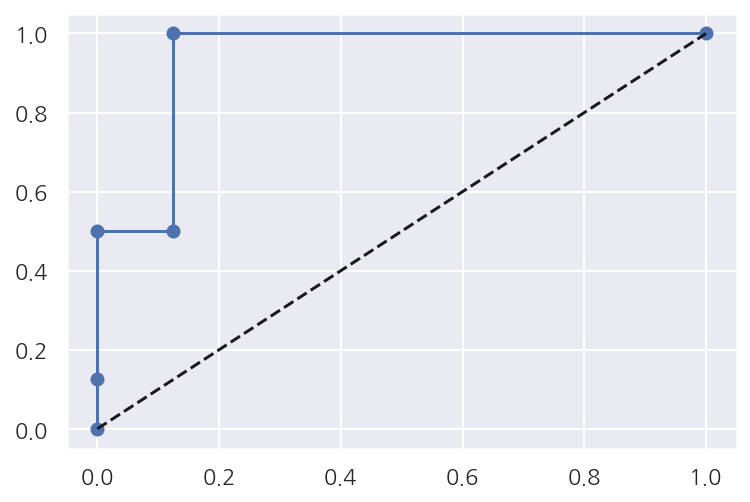

In [14]:
plt.plot(fpr, tpr, 'o-', label='LogisticRegression')
plt.plot([0,1], [0,1], 'k--')

- 재현율, 정밀도 등의 성능이 동일한 모형에서도 ROC 커브에서 살펴보면 성능이 달라지는 것을 볼 수 있다.

In [15]:
from sklearn.svm import SVC

X, y = make_classification(n_samples= 1000, weights=[0.95, 0.05], random_state=5)
model1 = LogisticRegression().fit(X,y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)

y_hat1 = model1.predict(X)
y_hat2 = model2.predict(X)

In [16]:
confusion_matrix(y, y_hat1)

array([[940,   3],
       [ 30,  27]], dtype=int64)

In [17]:
confusion_matrix(y, y_hat2)

array([[940,   3],
       [ 30,  27]], dtype=int64)

In [18]:
print(classification_report(y, y_hat1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [19]:
print(classification_report(y, y_hat2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



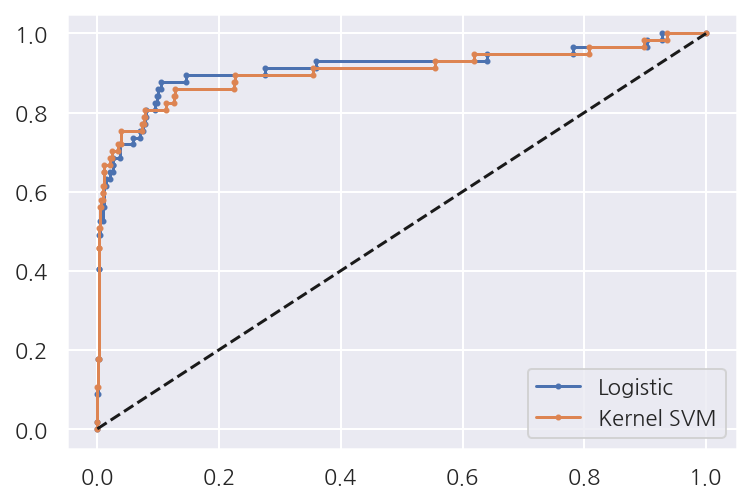

In [20]:
fpr1, tpr1, thresholds = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label='Logistic')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='Kernel SVM')
plt.legend()
plt.plot([0,1], [0,1], 'k--')
plt.show()

## AUC

In [21]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

## 다중 클래스 문제

- 각각의 클래스에 대해 OvR문제를 가정하고 각각의 OvR문제에 대해 ROC 커브를 그린다.

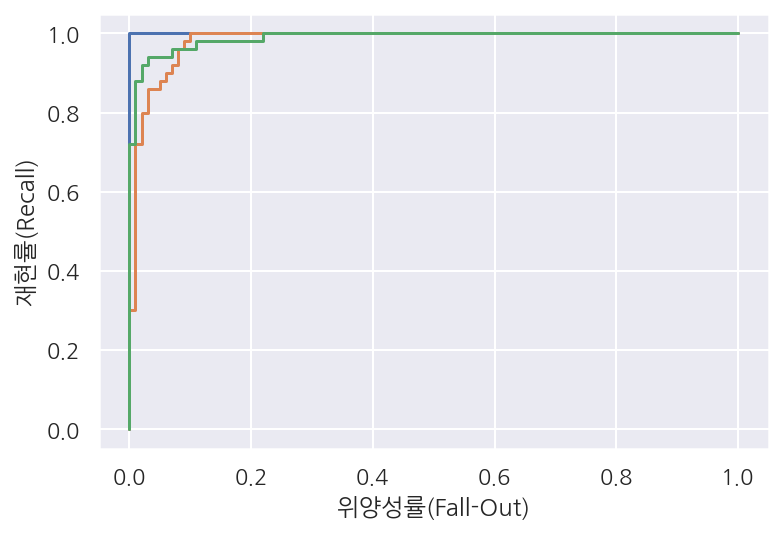

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

In [25]:
model = GaussianNB().fit(X, y[:, 0])

In [26]:
model.predict_proba(X)

array([[6.71160012e-010, 9.99999999e-001],
       [4.00302403e-009, 9.99999996e-001],
       [1.02351870e-009, 9.99999999e-001],
       [2.76121831e-009, 9.99999997e-001],
       [2.87820863e-010, 1.00000000e+000],
       [3.55110797e-008, 9.99999964e-001],
       [9.66021894e-010, 9.99999999e-001],
       [1.30959533e-009, 9.99999999e-001],
       [4.08140312e-009, 9.99999996e-001],
       [4.28674522e-009, 9.99999996e-001],
       [1.33377359e-009, 9.99999999e-001],
       [1.84532267e-009, 9.99999998e-001],
       [3.38128619e-009, 9.99999997e-001],
       [5.20232440e-009, 9.99999995e-001],
       [1.87082925e-009, 9.99999998e-001],
       [1.24819214e-009, 9.99999999e-001],
       [2.81930547e-009, 9.99999997e-001],
       [1.54701681e-009, 9.99999998e-001],
       [7.33966195e-008, 9.99999927e-001],
       [4.73129136e-010, 1.00000000e+000],
       [4.45844705e-008, 9.99999955e-001],
       [4.58044453e-009, 9.99999995e-001],
       [5.68754049e-010, 9.99999999e-001],
       [3.2

In [24]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])